In [125]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
# print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np

keep_le = []

def gen_GAC():
    gen_G =[]
    for i in range(1,11):
        gen_G.append('G'+str(i%11))
    gen_A =[]
    for i in range(1,7):
        gen_A.append('A'+str(i%7))
    gen_C =[]
    for i in range(1,3):
        gen_C.append('C'+str(i%3))

    string = []
    for i in range(10):
        for j in range(12):
            string.append(gen_G[i]+gen_A[j%6])
    sum =0
    count = 1
    for i in range(120):
        if sum < 6   :
            string[i] += 'C'+'1'
            sum +=1
        else :
            string[i] += 'C'+'2'
            sum +=1
            if sum == 12 :
                sum = 0
    return string
# หาindex 
def findrecode(product, area, chanel):
        row = 0
        pac = gen_GAC()
        for i in range(len(pac)):
            if len(pac[i]) > 6 :
                if pac[i][0:3] == product and pac[i][3:5] == area and pac[i][5:] == chanel: #แก้ตรงนี้
                    row = i
                    break
            else :
                if pac[i][0:2] == product and pac[i][2:4] == area and pac[i][4:] == chanel: #แก้ตรงนี้
                    row = i
                    break
        return row

sum=0
def transform_d(G,check=False,product=None,area=None,chanel=None):
    if check == False:
        global sum
        for i in range(4):
            le = LabelEncoder()
            keep_le.append(le)
            G[:, i] = keep_le[sum].fit_transform(G[:, i])
            sum += 1
    else:
        index = findrecode(product, area, chanel) #หาข้อมูลตำแน่งที่ต้องการ จะเปลี่ยนว่าจะไป อยู่ในตัวใดจาก 120 ตัว
        # print(index)
        for i in range(G.shape[1]-2):
            G[:,i] = keep_le[int(arr[index][i])].fit_transform(G[:,i])

# สำหรับอ้างอิงตำแหน่งใน keep_le
arr = np.zeros((120, 4))
xum = 0
for i in range(120):
    for j in range(4):
        arr[i][j] += xum
        xum += 1
        
# print(arr)

# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    transform_d(G)  # problem
    return G



In [126]:
# print(len(keep_le)) #เช็คตำนวน encode

# Good
def get_inverse(G,index):
    xx = []
    for i in range(G.shape[0]):
        xx.append(G[i,index])
    return xx

# not yet
def inverse_d(G,product, area, chanel):
    # print(product, area, chanel)
    index = findrecode(product, area, chanel) #หาข้อมูลตำแน่งที่ต้องการ จะเปลี่ยนว่าจะไป อยู่ในตัวใดจาก 120 ตัว
    # print(index)
    for i in range(G.shape[1]-2): # columns - 2 
        xx = get_inverse(G,i) # เอาข้อมูลจาก ฟังก์ชันมาแปลง กลับ เป็นตัวเดิม
        # print(xx)
        G[:,i] = keep_le[int(arr[index][i])].inverse_transform(xx)


In [127]:
#group 1

G111 = identifier('G1','A1','C1')

G121 = identifier('G1','A2','C1')

G131= identifier('G1','A3','C1')

G141 = identifier('G1','A4','C1')

G151 = identifier('G1','A5','C1')

G161 = identifier('G1','A6','C1')

G112 = identifier('G1','A1','C2')

G122 = identifier('G1','A2','C2')

G132 = identifier('G1','A3','C2')

G142 = identifier('G1','A4','C2')

G152 = identifier('G1','A5','C2')

G162 = identifier('G1','A6','C2')



In [128]:
#Group 2 
G211 = identifier('G2','A1','C1')

G221 = identifier('G2','A2','C1')

G231= identifier('G2','A3','C1')

G241 = identifier('G2','A4','C1')

G251 = identifier('G2','A5','C1')

G261 = identifier('G2','A6','C1')

G212 = identifier('G2','A1','C2')

G222 = identifier('G2','A2','C2')

G232 = identifier('G2','A3','C2')

G242 = identifier('G2','A4','C2')

G252 = identifier('G2','A5','C2')

G262 = identifier('G2','A6','C2')

In [129]:

#Group 3 
G311 = identifier('G3','A1','C1')

G321 = identifier('G3','A2','C1')

G331= identifier('G3','A3','C1')

G341 = identifier('G3','A4','C1')

G351 = identifier('G3','A5','C1')

G361 = identifier('G3','A6','C1')

G312 = identifier('G3','A1','C2')

G322 = identifier('G3','A2','C2')

G332 = identifier('G3','A3','C2')

G342 = identifier('G3','A4','C2')

G352 = identifier('G3','A5','C2')

G362 = identifier('G3','A6','C2')


In [130]:
#Group 4 
G411 = identifier('G4','A1','C1')

G421 = identifier('G4','A2','C1')

G431= identifier('G4','A3','C1')

G441 = identifier('G4','A4','C1')

G451 = identifier('G4','A5','C1')

G461 = identifier('G4','A6','C1')

G412 = identifier('G4','A1','C2')

G422 = identifier('G4','A2','C2')

G432 = identifier('G4','A3','C2')

G442 = identifier('G4','A4','C2')

G452 = identifier('G4','A5','C2')

G462 = identifier('G4','A6','C2')


In [131]:
#Group 5
G511 = identifier('G5','A1','C1')

G521 = identifier('G5','A2','C1')

G531= identifier('G5','A3','C1')

G541 = identifier('G5','A4','C1')

G551 = identifier('G5','A5','C1')

G561 = identifier('G5','A6','C1')

G512 = identifier('G5','A1','C2')

G522 = identifier('G5','A2','C2')

G532 = identifier('G5','A3','C2')

G542 = identifier('G5','A4','C2')

G552 = identifier('G5','A5','C2')

G562 = identifier('G5','A6','C2')


In [132]:
#Group 6
G611 = identifier('G6','A1','C1')

G621 = identifier('G6','A2','C1')

G631= identifier('G6','A3','C1')

G641 = identifier('G6','A4','C1')

G651 = identifier('G6','A5','C1')

G661 = identifier('G6','A6','C1')

G612 = identifier('G6','A1','C2')

G622 = identifier('G6','A2','C2')

G632 = identifier('G6','A3','C2')

G642 = identifier('G6','A4','C2')

G652 = identifier('G6','A5','C2')

G662 = identifier('G6','A6','C2')


In [133]:
#group 7 
G711 = identifier('G7','A1','C1')

G721 = identifier('G7','A2','C1')

G731= identifier('G7','A3','C1')

G741 = identifier('G7','A4','C1')

G751 = identifier('G7','A5','C1')

G761 = identifier('G7','A6','C1')

G712 = identifier('G7','A1','C2')

G722 = identifier('G7','A2','C2')

G732 = identifier('G7','A3','C2')

G742 = identifier('G7','A4','C2')

G752 = identifier('G7','A5','C2')

G762 = identifier('G7','A6','C2')


In [134]:
#group 8
G811 = identifier('G8','A1','C1')

G821 = identifier('G8','A2','C1')

G831= identifier('G8','A3','C1')

G841 = identifier('G8','A4','C1')

G851 = identifier('G8','A5','C1')

G861 = identifier('G8','A6','C1')

G812 = identifier('G8','A1','C2')

G822 = identifier('G8','A2','C2')

G832 = identifier('G8','A3','C2')

G842 = identifier('G8','A4','C2')

G852 = identifier('G8','A5','C2')

G862 = identifier('G8','A6','C2')


In [135]:
#group 9
G911 = identifier('G9','A1','C1')

G921 = identifier('G9','A2','C1')

G931= identifier('G9','A3','C1')

G941 = identifier('G9','A4','C1')

G951 = identifier('G9','A5','C1')

G961 = identifier('G9','A6','C1')

G912 = identifier('G9','A1','C2')

G922 = identifier('G9','A2','C2')

G932 = identifier('G9','A3','C2')

G942 = identifier('G9','A4','C2')

G952 = identifier('G9','A5','C2')

G962 = identifier('G9','A6','C2')


In [136]:
#group 10
G1011 = identifier('G10','A1','C1')

G1021 = identifier('G10','A2','C1')

G1031= identifier('G10','A3','C1')

G1041 = identifier('G10','A4','C1')

G1051 = identifier('G10','A5','C1')

G1061 = identifier('G10','A6','C1')

G1012 = identifier('G10','A1','C2')

G1022 = identifier('G10','A2','C2')

G1032 = identifier('G10','A3','C2')

G1042 = identifier('G10','A4','C2')

G1052 = identifier('G10','A5','C2')

G1062 = identifier('G10','A6','C2')


In [137]:

def gendate(final_day, start_day):
    old_year = int(start_day[0:4])
    recent_year = int(final_day[0:4])
    # print(old_year," ",recent_year)
    keep_y_m_d = []
    for y in range(old_year, recent_year+1):
        # print(y,end=''+'\n')
        for m in range(1, 13):
            # print(m,end=' '+'\n')
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12: #ลงท้ายด้วย คม
                for d in range(1, 32):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

            elif m == 2:
                if y == 2012 or y == 2016 or y == 2020 :     
                    for d in range(1, 30):
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
                else:
                    for d in range(1, 29):
                        # print(d,end=' ')
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
            else:                           #ลงท้ายด้วย ยน
                for d in range(1, 31):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

def transform_now(data):
    le = LabelEncoder()
    data[:,0]=le.fit_transform(data[:,0])


print(len(keep_le))

def fill_value_miss(miss_data):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import train_test_split
    transform_now(miss_data)
  
    x_train,x_test,y_train,y_test = train_test_split(miss_data[:,0],miss_data[:,1],test_size=0.2,random_state=21)
    dtree = KNeighborsRegressor(n_neighbors=3,weights='uniform')
    dtree.fit(x_train.reshape(-1,1),y_train)
    for i in range(miss_data.shape[0]):
        if miss_data[i,1] == 0 :
            pred = dtree.predict([[miss_data[i,0]]])
            miss_data[i,1] = pred 

480


In [138]:

def find_value_miss(G):
     # print(G[-1, 0],G[0, 0])
     date_full = gendate(G[-1, 0], G[0, 0])
     miss_data = [[0]*2 for i in range(date_full.shape[0])]
     miss_data = np.array(miss_data,dtype=object)
     count_miss_day = 0
     origin_index = 0
     for i in range(date_full.shape[0]):  
          if G[G == date_full[i]]:
               miss_data [i][0] = G[origin_index,0]
               miss_data [i][1] = G[origin_index,5]
               origin_index  +=1
          else :
               miss_data [i][0] = date_full[i]
               miss_data [i][1] = 0.0
               count_miss_day += 1
     # print(miss_data)
     fill_value_miss(miss_data)
     print('missing CumSales of invidual day =',count_miss_day)
     return miss_data


# info = find_value_miss(G111)

# plt.scatter(info[:20,0],info[:20,1])
# plt.show


In [139]:
inverse_d(G732,'G7','A3','C2')
info = find_value_miss(G732)

C:\Users\aumra\AppData\Local\Temp\ipykernel_10616\1071935966.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if G[G == date_full[i]]:


missing CumSales of invidual day = 3890


TypeError: 'int' object is not subscriptable

C:\Users\aumra\AppData\Local\Temp\ipykernel_10616\1071935966.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if G[G == date_full[i]]:


missing CumSales of invidual day = 347
502581.505673409
164095.0


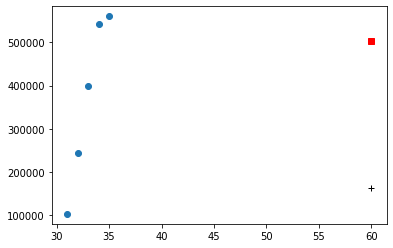

[35 560431.0]


In [ ]:

# inverse_d(G611,'G6','A1','C1')
info = find_value_miss(G611)
# print(info)
dtree = KNeighborsRegressor(n_neighbors=3,weights='distance')
X_train = info[31:36,0].reshape(-1,1)
y_train = info[31:36,1]
dtree.fit(X_train,y_train)
pred = dtree.predict([[60]])
# pred[0] -=300000  
print(pred[0])
print(info[60,1])


plt.scatter(info[31:36,0],info[31:36,1])
plt.plot(info[60,0],info[60,1],'+k')
plt.plot(info[60,0],pred,'sr')
plt.show()
print(info[35])